Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')


,title,main_speaker,views,comments
96,Militant atheism,Richard Dawkins,4374792,6404
0,Do schools kill creativity?,Ken Robinson,47227110,4553
644,Science can answer moral questions,Sam Harris,3433437,3356
201,My stroke of insight,Jill Bolte Taylor,21190883,2877
1787,How do you explain consciousness?,David Chalmers,2162764,2673
954,Taking imagination seriously,Janet Echelman,1832930,2492
840,On reading the Koran,Lesley Hazleton,1847256,2374
1346,Your body language may shape who you are,Amy Cuddy,43155405,2290
661,The danger of science denial,Michael Specter,1838628,2272
677,How great leaders inspire action,Simon Sinek,34309432,1930


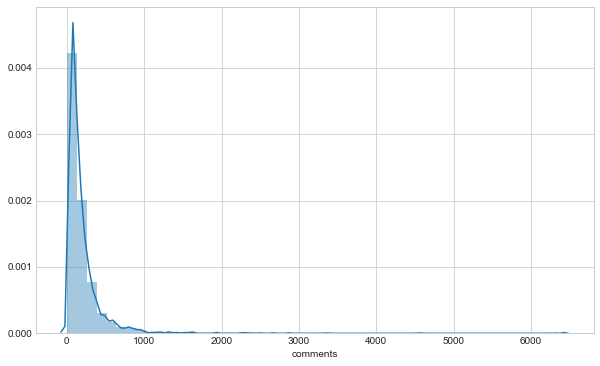

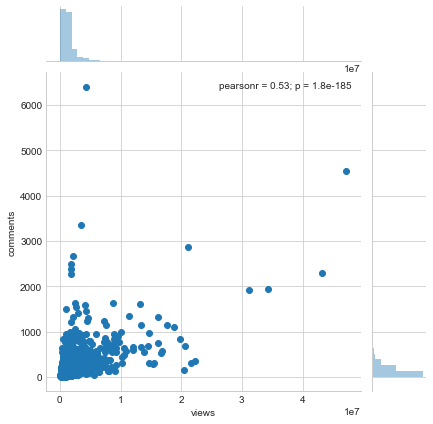

In [35]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv ('C:/Users/garim/Documents/Projects/Data Mining Project/ted_main.csv')
print (data.columns)
data['film_date'] = data['film_date'].apply(lambda x: dt.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
#print (data['film_date'])
len (data)
# viewing 25 most viewed ted talks
toptalks = data[['title', 'main_speaker', 'views', 'film_date']].sort_values('views', ascending=False)[:25]
toptalks
toptalks['abbr'] = toptalks['main_speaker'].apply(lambda x: x[:3])
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
#sns.barplot(x='abbr', y='views', data=toptalks)
#sns.distplot(data['views'])
#sns.distplot(data[data['views'] < 0.4e7]['views'])
data['views'].describe()
data['comments'].describe()
sns.distplot(data['comments'])
#sns.distplot(data[data['comments'] < 500]['comments'])
sns.jointplot(x='views', y='comments', data=data)
data[['views', 'comments']].corr()
data[['title', 'main_speaker','views', 'comments']].sort_values('comments', ascending=False).head(20)


In [36]:
data = data.sort_values('views')
mid = int(len(data)/2)
k=list(data['views'])
lowerQ = np.mean(sorted(k[:mid]))
mean = np.mean(sorted(k))
upperQ = np.mean(sorted(k[mid:]))
print(lowerQ)
print(mean)
print(upperQ)

729813.14902
1698297.48157
2666781.81412


In [37]:
views_based=""
def views_function(data_views):
        if (data_views<lowerQ):
            views_based='Poor'
        if (data_views>lowerQ and data_views<mean):
            views_based='Moderate'
        if (data_views<upperQ and data_views>mean):
            views_based='High'
        if (data_views>upperQ):
            views_based='Very High'
        return (views_based)
#colmun6 = data.ix[:, 5]  
data["views_based"] = data['views'].apply(views_function)

In [38]:
import ast
data['ratings'] = data['ratings'].apply(lambda x: ast.literal_eval(x))

In [41]:
talk_topic = ""
def topic_function(data_topic):
    data_topic = sorted(data_topic, key=lambda k: k['count'])
    return data_topic[0]['name']
data['Topics']= data['ratings'].apply(topic_function)
print (data['Topics'])

594     Unconvincing
1112    Unconvincing
237      Informative
776        Obnoxious
1133       Confusing
1229      Courageous
1141       Confusing
1079           Funny
1104       Obnoxious
1178       Obnoxious
1061       Obnoxious
1179           Funny
1301    Unconvincing
1053       Confusing
590        Ingenious
581            Funny
1119       Beautiful
1105       Confusing
1237       Confusing
1223       Obnoxious
1250       Obnoxious
1149       Confusing
323            Funny
649        Confusing
1192       Beautiful
2507    Unconvincing
292     Jaw-dropping
1198      Longwinded
1093       Confusing
1486      Courageous
            ...     
892     Unconvincing
47        Longwinded
1940       Confusing
4          Obnoxious
1501      Longwinded
381        Confusing
530        Obnoxious
262       Longwinded
176       Longwinded
1572       Obnoxious
29         Obnoxious
2161       Confusing
1579       Obnoxious
596        Confusing
553        Confusing
1129       Confusing
2109       Co

In [44]:

data.to_csv('ted_views.csv', sep=',',encoding='utf-8')

In [13]:
data.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views', 'views_based'],
      dtype='object')

In [91]:
from sklearn.model_selection import train_test_split
predictors = data.drop(['views_based','Topics','rating','film_date','comments','description','event','main_speaker','name','ratings','related_talks','speaker_occupation','tags','title','url'], axis=1)
target = data["views_based"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 1)

In [92]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

94.47


In [80]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

64.17


In [72]:
df = data['Topics'].nunique()
print(df)

13


In [73]:
set(data['Topics'])

{'Beautiful',
 'Confusing',
 'Courageous',
 'Funny',
 'Informative',
 'Ingenious',
 'Inspiring',
 'Jaw-dropping',
 'Longwinded',
 'OK',
 'Obnoxious',
 'Persuasive',
 'Unconvincing'}

In [84]:
pos_or_neg = ""
def pos_neg_function(rating):
    i=rating
    if (i=='Beautiful' or i=='Courageous' or i=='Funny' or i=='Informative' or i=='Ingenious' or i=='Inspiring' or i=='Jaw-dropping' or i=='Persuasive'):
        pos_or_neg='Positive'
    elif (i=='OK'):
        pos_or_neg='Neutral'
    else :
        pos_or_neg='Negative'
    return pos_or_neg
data["rating"] = data['Topics'].apply(pos_neg_function)
print(data.head())


      comments                                        description  duration  \
594         20  In the midst of an earlier crisis, Haitian aut...      3573   
1112        43  There are millions of prodigiously gifted musi...       816   
237         43  Singer-songwriter Rokia Traore performs "Kouna...       386   
776         40  Birds, a perennial human fascination, entertai...      1690   
1133        80  Five billion people can't use the Internet. Al...       594   

                         event   film_date  languages  \
594   University of California  12-10-2004          0   
1112              TEDxBrussels  21-11-2011          0   
237             TEDGlobal 2007  05-06-2007          0   
776            The Do Lectures  17-09-2009          0   
1133    TEDxSanMigueldeAllende  05-08-2011          0   

                                   main_speaker  \
594                            Edwidge Danticat   
1112  Charles Hazlewood + British Paraorchestra   
237                          

In [85]:
from sklearn.model_selection import train_test_split
predictors = data.drop(['views_based','rating','Topics','film_date','comments','description','event','main_speaker','name','ratings','related_talks','speaker_occupation','tags','title','url'], axis=1)
target = data["rating"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 1)

In [86]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)


62.75
